# Block layer latencies
Blklayer results from reading to the drp nvme-sssd. Each ssd was formatted with zfs.
The data are collected: blktrace->blkparse->btt

In [1]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#basepath = "/reg/data/ana01/temp/xrd/wilko/drp"
basepath = "/home/wilko/psdm/data/drp"

# latency data for driver to completion
#dq = pd.read_csv(join(basepath, "2018-03-08-nvme1n1_d2c_latency.csv"), names=["ts","lat"])
# latency data for queue to completion
dq = pd.read_csv(join(basepath, "2018-03-08-nvme1n1_q2c_latency.csv"), names=["ts","lat"])

dq.lat *= 1000.   #latency in ms 

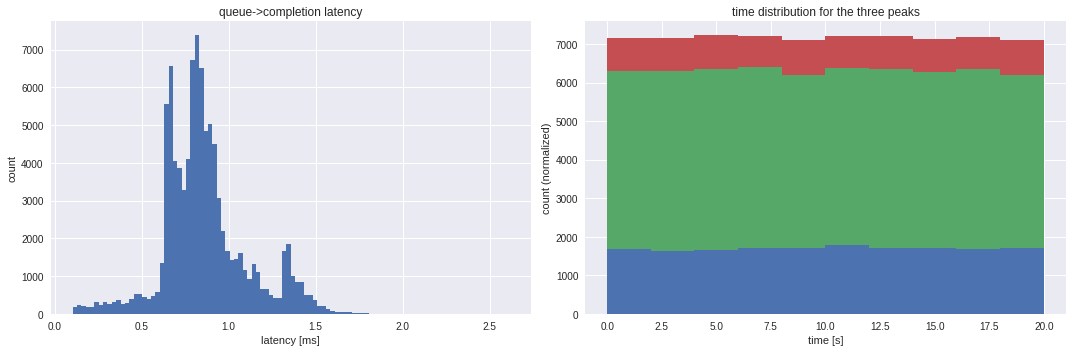

In [12]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
dq.lat.hist(bins=100)
plt.xlabel("latency [ms]")
plt.ylabel("count")
plt.title("queue->completion latency")

# Select the three peaks and plot how the entries
# are distributed in time (even it looks like) 
fig.add_subplot(122)
cut = (dq.lat > 0.6) & (dq.lat < 0.7)
cut1 = (dq.lat > 0.75) & (dq.lat < 1.0)
cut2 = (dq.lat > 1.3) 
q = dq.loc[cut].ts
q1 = dq.loc[cut1].ts
q2 = dq.loc[cut2].ts
q1.values
plt.hist((q.values,q1.values,q2.values), stacked=True)
plt.xlabel("time [s]")
plt.ylabel("count (normalized)")
plt.title("time distribution for the three peaks")

plt.tight_layout()
plt.show()

In [4]:
dq.loc[dq.lat>0.0].describe()

,ts,lat
count,97292.000000,97292.000000
mean,9.997936,0.861120
std,5.771741,0.247701
min,0.000000,0.103000
25%,5.001432,0.707000
50%,10.007127,0.828000
75%,14.993638,0.952000
max,19.998615,2.612000
